What is this about?
Football Dataset Analysis is to analyse and extract information from the [kaggle football dataset](https://www.kaggle.com/secareanualin/football-events/home).
I have mainly focused on Spanish La Liga in my analyses. As I am a huge fan of La liga. 

Tools and librariesused for development;
- Editor: [Jupyter Notebook]
- Programming language: [Python 3]
- Libraries: 
	1. numpy
	2. warning
	3. matplotlib
	4. pandas
	5. seaborn
	

In [153]:
import numpy as np 
import pandas as pd 
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from subprocess import check_output

In [154]:
## Loading events dataset
df_events = pd.read_csv(r"C:\Users\LENOVO\Documents\sports\processed\events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf = pd.read_csv(r"C:\Users\LENOVO\Documents\sports\processed\ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
df_ginf = df_ginf[['id_odsp', 'date', 'league', 'season', 'country']]

In [155]:
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events = df_events.merge(df_ginf, how='left')

In [156]:
## Naming the leagues with their popular names, which will make thinks much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}


In [157]:
## Apply the mapping
df_events['league'] = df_events['league'].map(leagues)

In [158]:
## Events type 1
event_type_1 = pd.Series([
    'Announcement',
    'Attempt',
    'Corner',
    'Foul',
    'Yellow card',
    'Second yellow card',
    'Red card',
    'Substitution',
    'Free kick won',
    'Offside',
    'Hand ball',
    'Penalty conceded'], index=[[item for item in range(0, 12)]])

## Events type 2
event_type2 = pd.Series(['Key Pass', 'Failed through ball', 'Sending off', 'Own goal'],
                       index=[[item for item in range(12, 16)]])

## Match side
side = pd.Series(['Home', 'Away'], index=[[item for item in range(1, 3)]])

## Shot place
shot_place = pd.Series([
    'Bit too high', 
    'Blocked',
    'Bottom left corner',
    'Bottom right corner',
    'Centre of the goal',
    'High and wide',
    'Hits the bar',
    'Misses to the left',
    'Misses to the right',
    'Too high',
    'Top centre of the goal',
    'Top left corner',
    'Top right corner'
], index=[[item for item in range(1, 14)]])

## Outcome of shot
shot_outcome = pd.Series(['On target', 'Off target', 'Blocked', 'Hit the bar'],
                        index=[[item for item in range(1, 5)]])
## Location of shot
location = pd.Series([
    'Attacking half',
    'Defensive half',
    'Centre of the box',
    'Left wing',
    'Right wing',
    'Difficult angle and long range',
    'Difficult angle on the left',
    'Difficult angle on the right',
    'Left side of the box',
    'Left side of the six yard box',
    'Right side of the box',
    'Right side of the six yard box',
    'Very close range',
    'Penalty spot',
    'Outside the box',
    'Long range',
    'More than 35 yards',
    'More than 40 yards',
    'Not recorded'
], 
index=[[item for item in range(1, 20)]])

## Players' body part
bodypart = pd.Series(['right foot', 'left foot', 'head'], index=[[item for item in range(1, 4)]])

## Assist method
assist_method = pd.Series(['None', 'Pass', 'Cross', 'Headed pass', 'Through ball'],
                         index=[item for item in range(0, 5)])

## Situation
situation = pd.Series(['Open play', 'Set piece', 'Corner', 'Free kick'],
                     index=[item for item in range(1, 5)])

In [159]:
event_type_1

0           Announcement
1                Attempt
2                 Corner
3                   Foul
4            Yellow card
5     Second yellow card
6               Red card
7           Substitution
8          Free kick won
9                Offside
10             Hand ball
11      Penalty conceded
dtype: object

In [160]:
## Utility function to plot bar plots with similar configuration
## this function was took from this website : 
#https://www.kaggle.com/luizhsda/football-exploratory-data-analysis-eda
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted'):
    sns.set_style("whitegrid")   
    ## Set a figure with custom figsize
    plt.figure(figsize=(10, 8)) 
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

In [161]:
## Count of events occurecies
#events_series = df_events['event_type'].value_counts()

## Plotting chart 
#plot_barplot(events_series, event_type_1.values,
            #"Event type", "Number of events", "Event types")

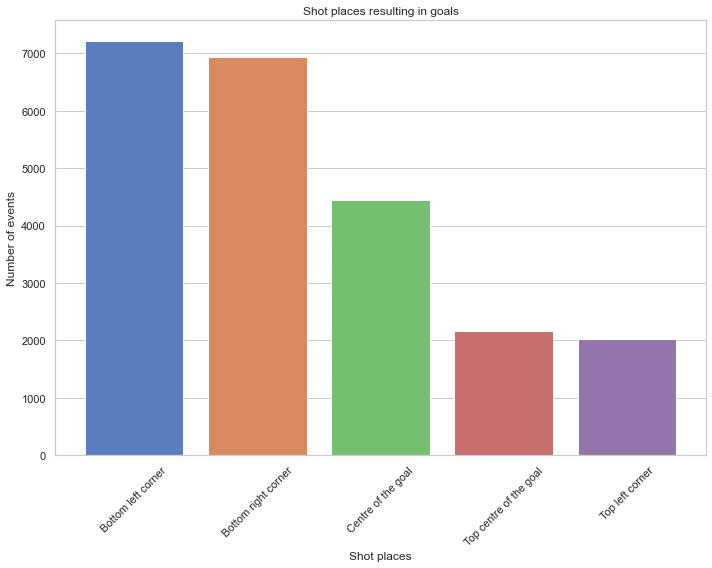

In [162]:
## Filtering out dataframe to extract attemtps which resulted in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 1)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place[[3, 4, 5, 11, 12]], 'Shot places', 'Number of events',
    'Shot places resulting in goals')
plt.savefig('foot2.png')

In [163]:
df_events

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,0,9.0,2.0,1,1.0,0,2011-08-05,Bundesliga,2012,germany
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,NaN,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,NaN,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,0,NaN,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,0,2.0,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,8,NaN,2,Sampdoria,Atalanta,...,0,2.0,NaN,0,NaN,0,2017-01-22,Serie A,2017,italy
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",2,NaN,2,Sampdoria,Atalanta,...,0,NaN,NaN,0,NaN,0,2017-01-22,Serie A,2017,italy
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,1,12.0,2,Sampdoria,Atalanta,...,0,9.0,1.0,1,3.0,0,2017-01-22,Serie A,2017,italy
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,8,NaN,1,Atalanta,Sampdoria,...,0,4.0,NaN,0,NaN,0,2017-01-22,Serie A,2017,italy


In [164]:
df_ginf

,id_odsp,date,league,season,country
0,UFot0hit/,2011-08-05,D1,2012,germany
1,Aw5DflLH/,2011-08-06,D1,2012,germany
2,bkjpaC6n/,2011-08-06,D1,2012,germany
3,CzPV312a/,2011-08-06,F1,2012,france
4,GUOdmtII/,2011-08-06,F1,2012,france
...,...,...,...,...,...
10107,xAkY8l6R/,2017-01-22,I1,2017,italy
10108,xSU9scI9/,2017-01-22,E0,2017,england
10109,xY7uZwOI/,2017-01-22,F1,2017,france
10110,YyeGxMX8/,2017-01-22,SP1,2017,spain


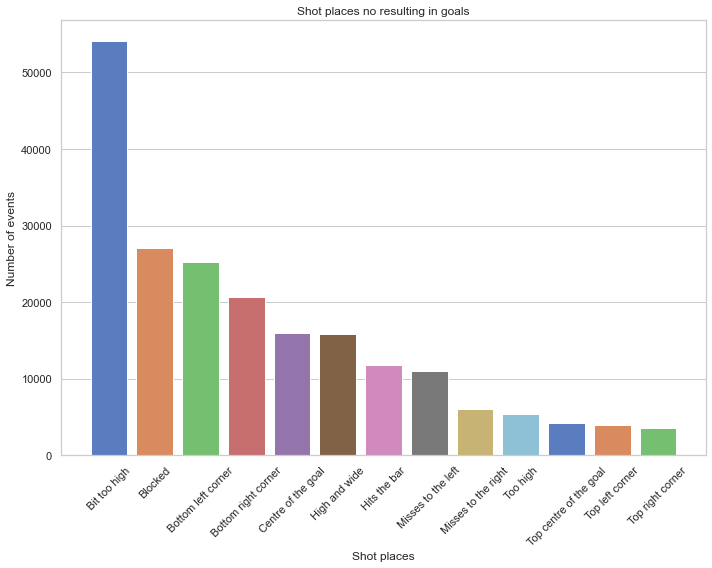

In [165]:
## Filtering out dataframe to extract attemtps which resulted in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 0)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place, 'Shot places', 'Number of events',
    'Shot places no resulting in goals')
plt.savefig('foot3.png')

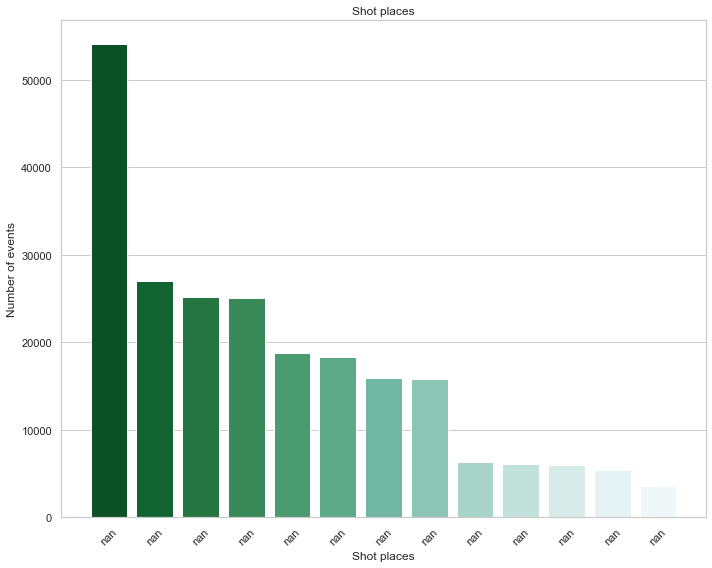

In [166]:
## Copying original dataframe
df_shot_places_ed = df_events.copy()

## Grouping data by shot places
df_shot_places_ed = df_events.groupby('shot_place', as_index=False).count().sort_values('id_event',
                                                   ascending=False).dropna()

## Mapping dataframe index to shot places labels available in the dictionary file
df_shot_places_ed['shot_place'] = df_shot_places_ed['shot_place'].map(shot_place)

## Plotting the chart
plot_barplot(df_shot_places_ed['id_event'], df_shot_places_ed['shot_place'],
             'Shot places',
             'Number of events',
             'Shot places',
             'BuGn_r')
plt.savefig('foot4.png')

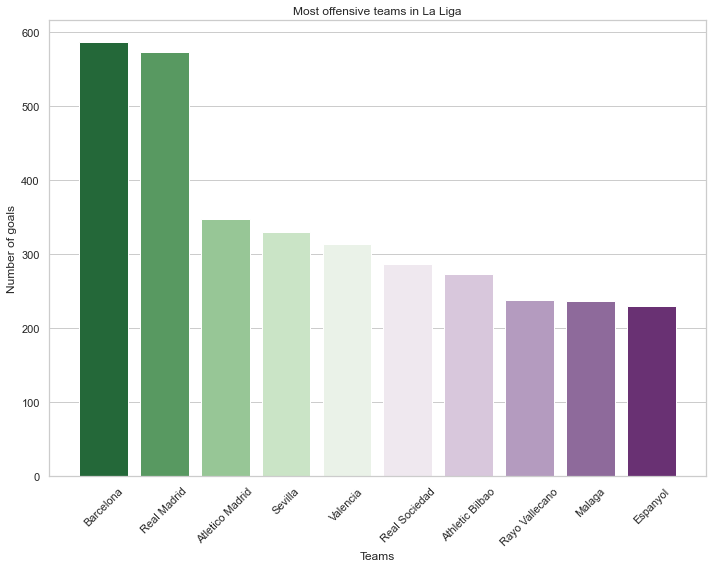

In [167]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['league']=='La Liga'][df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=False)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', 'Number of goals', 'Most offensive teams in La Liga','PRGn_r')
plt.savefig('foot5.png')

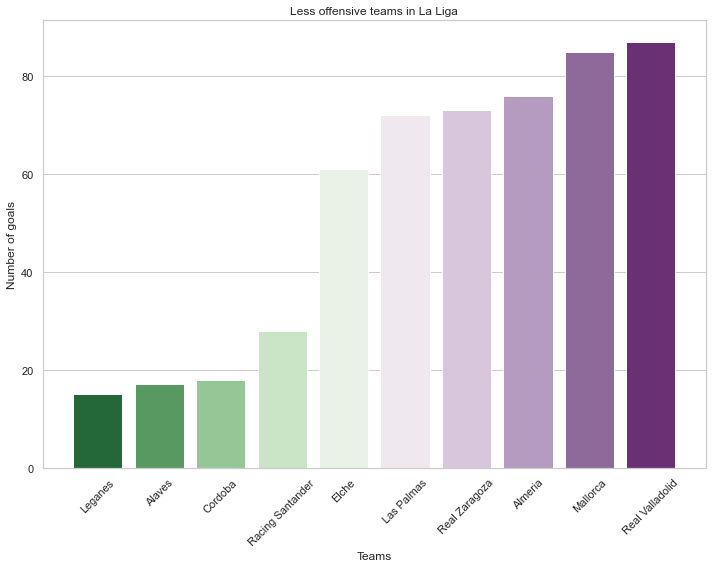

In [168]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['league']=='La Liga'][df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=True)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', 'Number of goals', 'Less offensive teams in La Liga', 'PRGn_r')
plt.savefig('foot6.png')

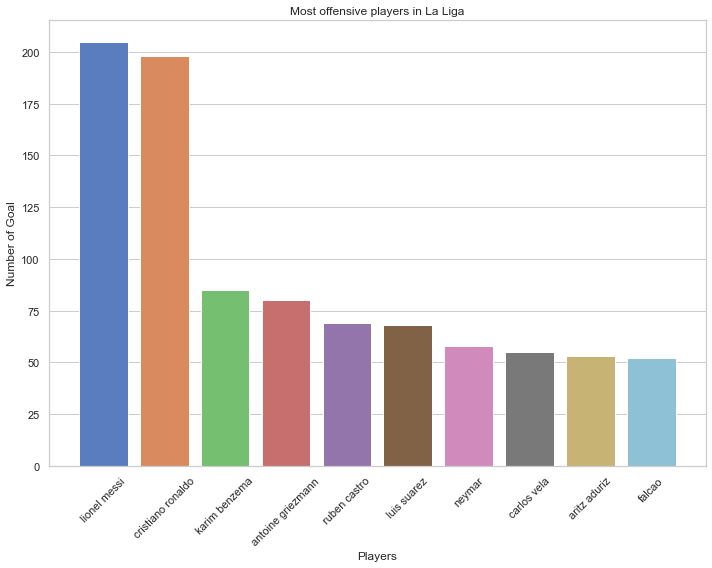

In [169]:
## grouping by player when is goal
grouping_by_offensive_player = df_events[df_events['league']=='La Liga'][df_events['is_goal']==1].groupby('player')

## Couting and sorting the number of goals by player, then pick the top 10
grouping_by_offensive_player = grouping_by_offensive_player.count().sort_values(by='id_event',
                                                                                ascending=False)[:10]
## Extracting player names
players = grouping_by_offensive_player.index
## Extracting values (# of goals)
scores = grouping_by_offensive_player['id_event']

## Plotting the chart
plot_barplot(scores, players, 'Players', 'Number of Goal', 'Most offensive players in La Liga')
plt.savefig('foot7.png')

In [170]:
## Loading events dataset
df_events1 = pd.read_csv(r"C:\Users\LENOVO\Documents\sports\processed\events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf1 = pd.read_csv(r"C:\Users\LENOVO\Documents\sports\processed\ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events1 = df_events1.merge(df_ginf1, how='left')
df_events1 = df_events1[['id_odsp', 'id_event', 'league', 'season', 'ht', 'at', 'event_team', 'is_goal']]
## Naming the leagues with their popular names.
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}
## Apply the mapping
df_events1['league'] = df_events1['league'].map(leagues)


In [171]:
df_events1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941009 entries, 0 to 941008
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_odsp     941009 non-null  object
 1   id_event    941009 non-null  object
 2   league      941009 non-null  object
 3   season      941009 non-null  int64 
 4   ht          941009 non-null  object
 5   at          941009 non-null  object
 6   event_team  941009 non-null  object
 7   is_goal     941009 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 64.6+ MB


In [172]:
import warnings
warnings.filterwarnings('ignore')

In [173]:
Leagues = df_events1['league'].unique()
Seasons = list(df_events1['season'].unique())
print(Leagues)
print(Seasons)

['Bundesliga' 'League One' 'La Liga' 'Serie A' 'Premier League']
[2012, 2013, 2014, 2015, 2016, 2017]


In [174]:
df_events1[df_events1['league']== 'Bundesliga'][df_events1['season'] == 2012]['ht'].unique()

array(['Borussia Dortmund', 'FC Augsburg', 'Werder Bremen',
       'Hertha Berlin', 'FC Cologne', 'VfB Stuttgart', 'Hannover 96',
       'Mainz', 'Bayern Munich', 'Schalke 04', 'TSG Hoffenheim',
       'Nurnberg', 'SC Freiburg', 'Hamburg SV',
       'Borussia Monchengladbach', 'VfL Wolfsburg', 'Bayer Leverkusen',
       'Kaiserslautern'], dtype=object)

In [175]:
## grouping by player when is goal
goal = df_events[df_events['is_goal']==1]

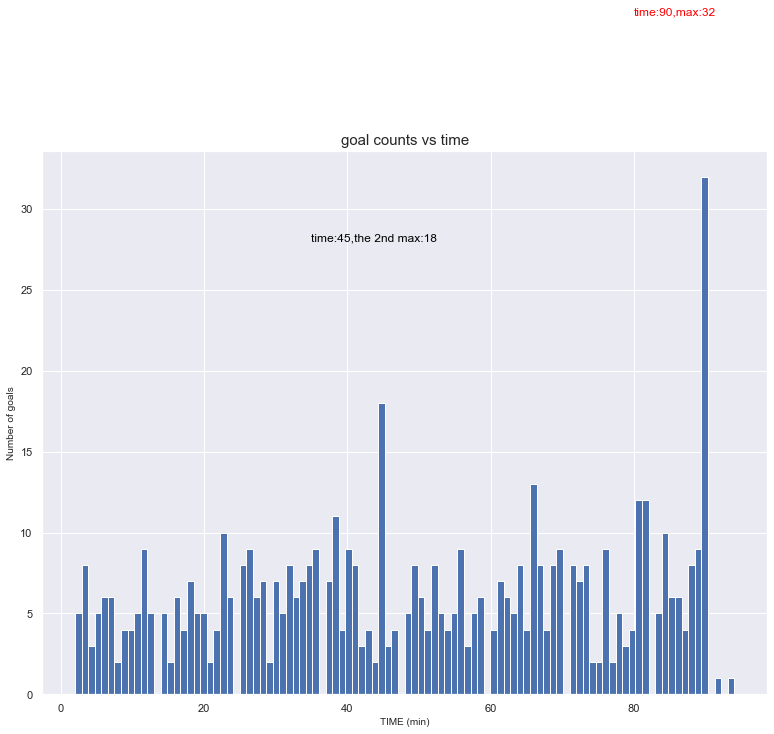

In [222]:
## Plotting the hist
fig=plt.figure(figsize=(13,10))
plt.hist(goal.time, 100)
plt.xlabel("TIME (min)",fontsize=10)
plt.ylabel("Number of goals",fontsize=10)
plt.title("goal counts vs time",fontsize=15)
x=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[0]
y=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[0]
x1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[1]
y1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[1]
plt.text(x=x-10,y=y+10,s='time:'+str(x)+',max:'+str(y),fontsize=12,fontdict={'color':'red'})
plt.text(x=x1-10,y=y1+10,s='time:'+str(x1)+',the 2nd max:'+str(y1),fontsize=12,fontdict={'color':'black'})
plt.savefig('foot8.png')
plt.show() 

In [177]:
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]

In [178]:
shot_outcomes = {1:'On target', 2:'Off target', 3:'Blocked', 4:'Hit the bar'}
assist_methods = {0:np.nan, 1:'Pass', 2:'Cross', 3:'Headed pass', 4:'Through ball'}
situations = {1:'Open play', 2:'Set piece', 3:'Corner', 4:'Free kick'}
goal['shot_outcome'] = goal['shot_outcome'].map(shot_outcomes)
goal['assist_method'] =goal['assist_method'].map(assist_methods)
goal['situation'] = goal['situation'].map(situations)

In [179]:
goal1=goal.copy()

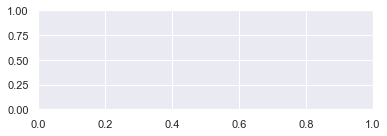

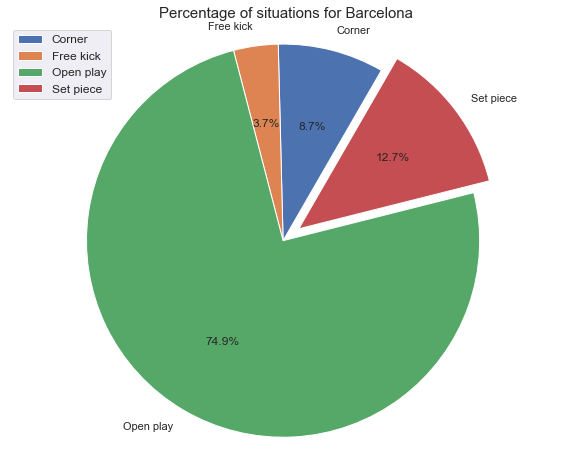

In [223]:
plt.subplot(2,1,1)
plt.figure(figsize=(10,8))
data1=goal1.groupby(by=['situation'])['situation'].count()
colors=["green", "red","yellow", "pink"]
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of situations for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.savefig('foot9.png')

In [181]:
data1

situation
Corner        34
Free kick     20
Open play    472
Set piece     60
Name: situation, dtype: int64

In [182]:
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga']
goal['shot_outcome'] = goal['shot_outcome'].map(shot_outcomes)
goal1=goal.copy()

ValueError: 'explode' must be of length 'x'

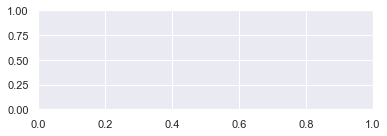

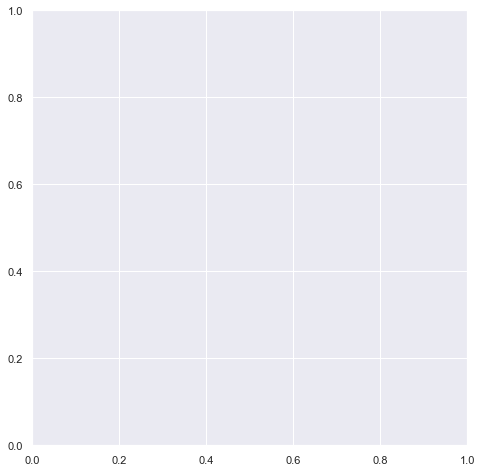

In [225]:
#plt.subplot(2,1,2)
#plt.figure(figsize=(10,8))
#data2=goal1.groupby(by=['shot_outcome'])['shot_outcome'].count()
#colors=["green", "red","yellow", "pink"]
#plt.pie(data2,autopct='%1.1f%%',labels=data2.index,startangle=60,explode=(0.1,0,0,0))
#plt.axis('equal')
#plt.title("Percentage of shot outcome",fontsize=15)
#plt.legend(fontsize=12,loc='best')
#plt.savefig('foot10.png')

In [184]:
from matplotlib.gridspec import GridSpec

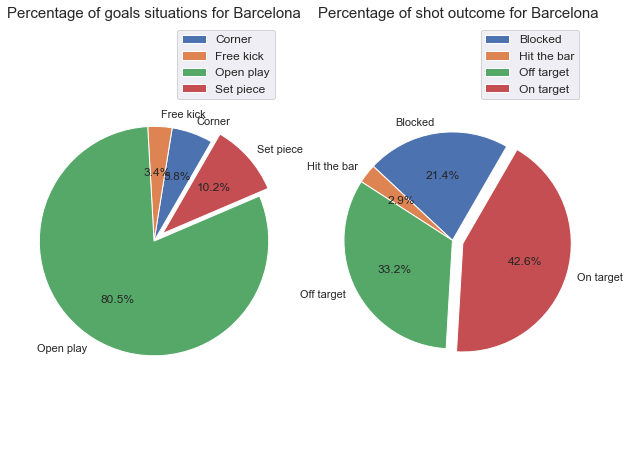

In [226]:
the_grid = GridSpec(1, 2)
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
plt.figure(figsize=(10,8))

data1=goal1.groupby(by=['situation'])['situation'].count()
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')

goals = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga']
goals['shot_outcome'] = goals['shot_outcome'].map(shot_outcomes)
goals1=goals.copy()
data2=goals1.groupby(by=['shot_outcome'])['shot_outcome'].count()
colors=["green", "red","yellow", "pink"]
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(data2,autopct='%1.1f%%',labels=data2.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of shot outcome for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.savefig('foot11.png')
plt.show()

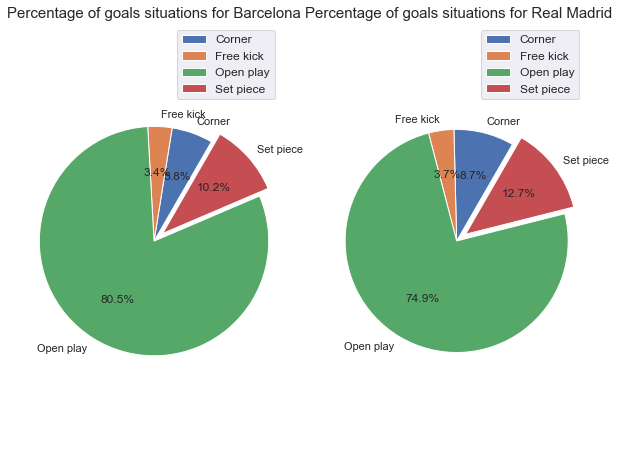

In [227]:
the_grid = GridSpec(1, 2)
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
plt.figure(figsize=(10,8))
# plt.subplot(2,1,1)

data1=goal1.groupby(by=['situation'])['situation'].count()
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')


goal = df_events[df_events['event_team']=='Real Madrid'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
# plt.subplot(2,1,2)
# plt.figure(figsize=(10,8))
data1=goal1.groupby(by=['situation'])['situation'].count()
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Real Madrid",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.savefig('foot12.png')
plt.show()

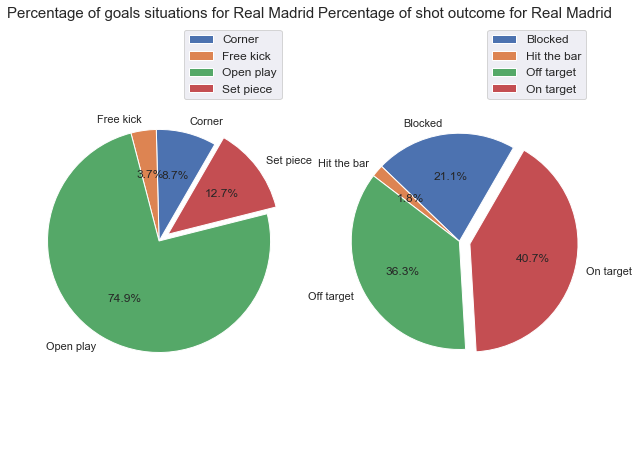

In [228]:
the_grid = GridSpec(1, 2)
goal = df_events[df_events['event_team']=='Real Madrid'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
plt.figure(figsize=(10,8))

data1=goal1.groupby(by=['situation'])['situation'].count()
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Real Madrid",fontsize=15)
plt.legend(fontsize=12,loc='best')


goals = df_events[df_events['event_team']=='Real Madrid'][df_events['league']=='La Liga']
goals['shot_outcome'] = goals['shot_outcome'].map(shot_outcomes)
goals1=goals.copy()
data2=goals1.groupby(by=['shot_outcome'])['shot_outcome'].count()
colors=["green", "red","yellow", "pink"]
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(data2,autopct='%1.1f%%',labels=data2.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of shot outcome for Real Madrid",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.savefig('foot13.png')
plt.show()

In [188]:
data2

shot_outcome
Blocked         785
Hit the bar      68
Off target     1349
On target      1514
Name: shot_outcome, dtype: int64

In [189]:
redCards = df_events[df_events['league']=='La Liga'][df_events['event_type'] == 6]['event_team']

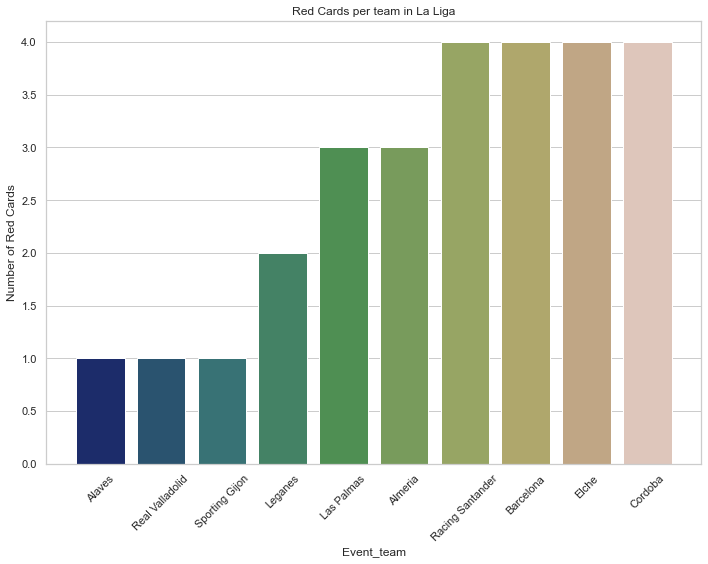

In [229]:
## Count of events occurecies
redCards_series = redCards.value_counts().sort_values(ascending=True)[:10]

## Plotting chart 
plot_barplot(redCards_series, redCards_series.index,
            "Event_team", "Number of Red Cards", "Red Cards per team in La Liga", 'gist_earth')
plt.savefig('foot14.png')

In [191]:
yellowCards = df_events[df_events['league']=='La Liga'][df_events['event_type'] == (4 or 5)]['event_team']

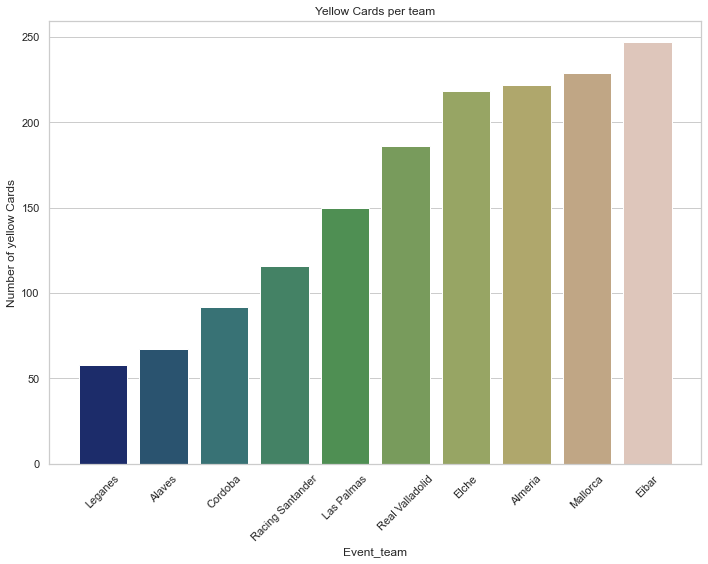

In [230]:
## Count of events occurecies
yellowCards_series = yellowCards.value_counts().sort_values(ascending=True)[:10]

## Plotting chart 
plot_barplot(yellowCards_series, yellowCards_series.index,
            "Event_team", "Number of yellow Cards", "Yellow Cards per team", 'gist_earth')
plt.savefig('foot15.png')

In [193]:
df_events['event_team'].unique()

array(['Hamburg SV', 'Borussia Dortmund', 'FC Augsburg', 'SC Freiburg',
       'Werder Bremen', 'Kaiserslautern', 'Lorient',
       'Paris Saint-Germain', 'Valenciennes', 'Caen', 'Hertha Berlin',
       'Nurnberg', 'Evian Thonon Gaillard', 'Brest', 'AC Ajaccio',
       'Toulouse', 'Nice', 'Lyon', 'VfL Wolfsburg', 'FC Cologne',
       'AS Nancy Lorraine', 'Lille', 'Montpellier', 'AJ Auxerre',
       'VfB Stuttgart', 'Schalke 04', 'Hannover 96', 'TSG Hoffenheim',
       'Sochaux', 'Marseille', 'Bordeaux', 'St Etienne', 'Stade Rennes',
       'Dijon FCO', 'Mainz', 'Bayer Leverkusen', 'Bayern Munich',
       'Borussia Monchengladbach', 'Sporting Gijon', 'Real Sociedad',
       'Valencia', 'Racing Santander', 'Real Madrid', 'Real Zaragoza',
       'Sevilla', 'Malaga', 'Rayo Vallecano', 'Athletic Bilbao', 'Getafe',
       'Levante', 'Osasuna', 'Atletico Madrid', 'Espanyol', 'Mallorca',
       'Villarreal', 'Barcelona', 'AC Milan', 'Lazio', 'Cesena', 'Napoli',
       'Internazionale', 'Palerm

In [194]:
def Team_strategy(team):  
    goal = df_events[df_events['is_goal']==1][df_events['event_team'] == team]
    plt.hist(goal[goal["situation"]==1]["time"],width=1,bins=100,label="Open play")   
    plt.hist(goal[goal["situation"]==2]["time"],width=1,bins=100,label="Set Piece (excluding direct FreeKick)") 
    plt.hist(goal[goal["situation"]==3]["time"],width=1,bins=100,label="Corners") 
    plt.hist(goal[goal["situation"]==4]["time"],width=1,bins=100,label="Direct Free Kick") 
    plt.xlabel("Minutes")
    plt.ylabel("Number of goals")
    plt.legend()
    plt.title("Number of goals (by situations) against Time during match for {}".format(team),fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
    plt.tight_layout()

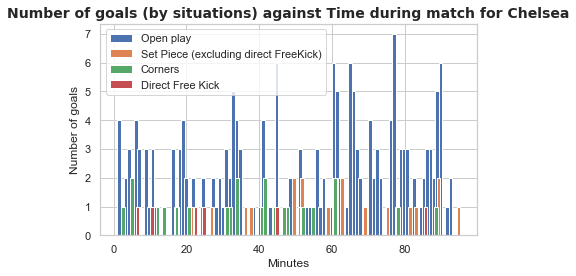

In [231]:
# plt.subplot(4,1,1)
team = 'Chelsea'
Team_strategy(team)
plt.savefig('foot16.png')

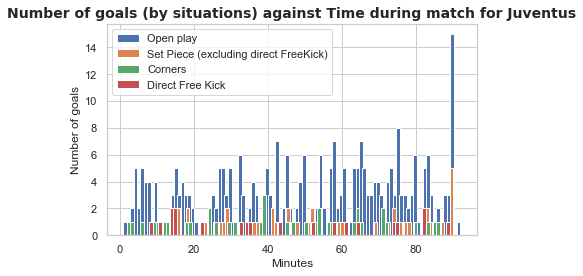

In [232]:
# plt.subplot(4,1,2)
team = 'Juventus'
Team_strategy(team)
plt.savefig('foot17.png')

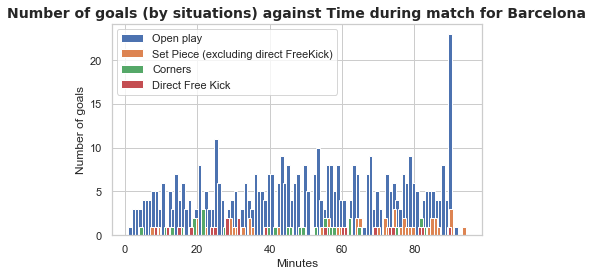

In [233]:
# plt.subplot(4,1,3)
team = 'Barcelona'
Team_strategy(team)
plt.savefig('foot18.png')

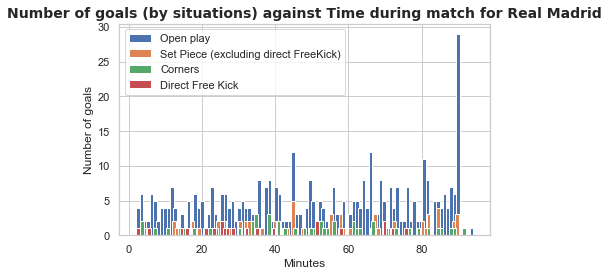

In [234]:
# plt.subplot(4,1,4)
team = 'Real Madrid'
Team_strategy(team)
plt.savefig('foot19.png')

In [199]:
# Penalties
penalties=df_events[df_events["location"]==14]

In [200]:
# Check the shot place
for i in range(14):
    if sum(penalties["shot_place"]==i)==0:
        print(i)

0
2


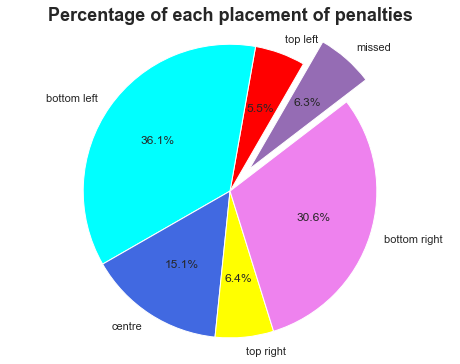

In [235]:
top_left=sum(penalties["shot_place"]==12)
bot_left=sum(penalties["shot_place"]==3)
top_right=sum(penalties["shot_place"]==13)
bot_right=sum(penalties["shot_place"]==4)
centre=sum(penalties["shot_place"]==5)+sum(penalties["shot_place"]==11)
missed=sum(penalties["shot_place"]==1)+sum(penalties["shot_place"]==6)+sum(penalties["shot_place"]==7)+sum(penalties["shot_place"]==8)+sum(penalties["shot_place"]==9)+sum(penalties["shot_place"]==10)

labels_pen=["top left","bottom left","centre","top right","bottom right","missed"]
num_pen=[top_left,bot_left,centre,top_right,bot_right,missed]
colors_pen=["red", "aqua","royalblue","yellow","violet","m"]
plt.pie(num_pen,labels=labels_pen,colors=colors_pen,autopct='%1.1f%%',startangle=60,explode=(0,0,0,0,0,0.2))
plt.axis('equal')
plt.title("Percentage of each placement of penalties",fontsize=18,fontweight="bold")
fig=plt.gcf()  
fig.set_size_inches(8,6)
plt.savefig('foot20.png')
plt.show()

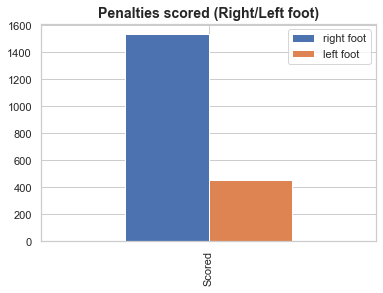

In [236]:
# success rate of penalties
scored_pen=penalties[penalties["is_goal"]==1]
pen_rightfoot=scored_pen[scored_pen["bodypart"]==1].shape[0]
pen_leftfoot=scored_pen[scored_pen["bodypart"]==2].shape[0]

penalty_combi=pd.DataFrame({"right foot":pen_rightfoot,"left foot":pen_leftfoot},index=["Scored"])
penalty_combi.plot(kind="bar")
plt.title("Penalties scored (Right/Left foot)",fontsize=14,fontweight="bold")
penalty_combi
plt.savefig('foot21.png')

In [203]:
def pen_stats(player):
    player_pen=penalties[penalties["player"]==player]
    right_attempt=player_pen[player_pen["bodypart"]==1]
    right_attempt_scored=right_attempt[right_attempt["is_goal"]==1].shape[0]
    right_attempt_missed=right_attempt[right_attempt["is_goal"]==0].shape[0]
    left_attempt=player_pen[player_pen["bodypart"]==2]
    left_attempt_scored=left_attempt[left_attempt["is_goal"]==1].shape[0]
    left_attempt_missed=left_attempt[left_attempt["is_goal"]==0].shape[0]
    scored=pd.DataFrame({"right foot":right_attempt_scored,"left foot":left_attempt_scored},index=["Scored"])
    missed=pd.DataFrame({"right foot":right_attempt_missed,"left foot":left_attempt_missed},index=["Missed"])
    combi=scored.append(missed)
    return combi

In [204]:
pen_stats("james rodriguez")

,right foot,left foot
Scored,0,2
Missed,0,0


In [205]:
pen_stats("lionel messi")

,right foot,left foot
Scored,0,30
Missed,0,7


In [206]:
pen_stats("cristiano ronaldo")

,right foot,left foot
Scored,43,0
Missed,8,0


In [207]:
pen_stats('mohamed sallah')

,right foot,left foot
Scored,0,0
Missed,0,0


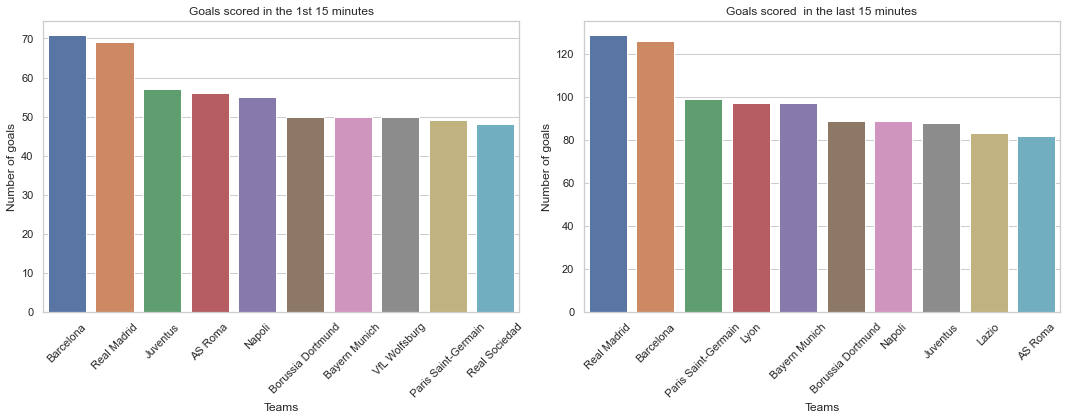

In [237]:
## Filtering out events with time <= 15'
first_15 = df_events[df_events['time'] <= 15]
## Filtering out events with time between 75' and 90'
last_15 = df_events[(df_events['time'] >= 75) & (df_events['time'] <= 90)]

## Grouping by teams for the first 15'
top_10_scorer_first_15 = first_15[first_15['is_goal'] == 1].groupby('event_team').count().sort_values(by='id_event', ascending=False)

## Extracting teams from dataframe
teams = top_10_scorer_first_15.index[:10]
## Extracting number of goals 
scores = top_10_scorer_first_15['id_event'][:10]

## Plotting results
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
ax = sns.barplot(x = [j for j in range(0, len(scores))], y=scores.values, ax=axs[0])
ax.set_xticks([j for j in range(0, len(scores))])
ax.set_xticklabels(teams, rotation=45)
ax.set(xlabel = 'Teams', ylabel = 'Number of goals', title = 'Goals scored in the 1st 15 minutes');

## Grouping by last 15' scorers
top_10_scorer_last_15 = last_15[last_15['is_goal'] == 1].groupby('event_team').count().sort_values(by='id_event', ascending=False)[:10]

## Extracting the names of the teams
teams_last_15 = top_10_scorer_last_15.index[:10]
## Extracting the number of goals
scores_last_15 = top_10_scorer_last_15['id_event'][:10]

## Plottin the results
ax = sns.barplot(x = [j for j in range(0, len(scores_last_15))], y=scores_last_15.values, ax=axs[1])
ax.set_xticks([j for j in range(0, len(scores_last_15))])
ax.set_xticklabels(teams_last_15, rotation=45)
ax.set(xlabel = 'Teams', ylabel = 'Number of goals', title = 'Goals scored  in the last 15 minutes');
plt.savefig('foot22.png')
fig.tight_layout()

In [209]:
# penalties["player"].unique()

In [210]:
def pen_full_stats(player):
    player_pen=penalties[penalties["player"]==player]
    scored_pen=player_pen[player_pen["is_goal"]==1]
    missed_pen=player_pen[player_pen["is_goal"]==0]
    
    top_left_rightfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==1].shape[0]
    top_left_leftfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==2].shape[0]
    bot_left_rightfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==1].shape[0]
    bot_left_leftfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==2].shape[0]
    top_right_rightfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==1].shape[0]
    top_right_leftfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==2].shape[0]
    bot_right_rightfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==1].shape[0]
    bot_right_leftfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==2].shape[0]
    centre_rightfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==1].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==1].shape[0]
    centre_leftfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==2].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==2].shape[0]
    scored_without_recorded_loc_rightfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==1].shape[0]
    scored_without_recorded_loc_leftfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==2].shape[0]
    missed_rightfoot=missed_pen[missed_pen["bodypart"]==1].shape[0]
    missed_leftfoot=missed_pen[missed_pen["bodypart"]==2].shape[0]
    
    right_foot=pd.DataFrame({"Top Left Corner":top_left_rightfoot,"Bottom Left Corner":bot_left_rightfoot,"Top Right Corner":top_right_rightfoot,"Bottom Right Corner":bot_right_rightfoot,"Centre":centre_rightfoot,"Unrecorded placement":scored_without_recorded_loc_rightfoot,"Missed":missed_rightfoot},index=["Right Foot attempt"])
    left_foot=pd.DataFrame({"Top Left Corner":top_left_leftfoot,"Bottom Left Corner":bot_left_leftfoot,"Top Right Corner":top_right_leftfoot,"Bottom Right Corner":bot_right_leftfoot,"Centre":centre_leftfoot,"Unrecorded placement":scored_without_recorded_loc_leftfoot,"Missed":missed_leftfoot},index=["Left Foot attempt"])
    
    fullstats=right_foot.append(left_foot)
    fullstats=fullstats[["Top Right Corner","Bottom Right Corner","Top Left Corner","Bottom Left Corner","Centre","Unrecorded placement","Missed"]]
    return fullstats


In [211]:
import warnings
warnings.filterwarnings('ignore')

In [212]:
pen_full_stats("lionel messi")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,0,0,0,0,0,0,0
Left Foot attempt,7,8,3,6,5,1,7


In [213]:
pen_full_stats("cristiano ronaldo")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,3,14,2,19,3,2,8
Left Foot attempt,0,0,0,0,0,0,0


In [214]:
def stats(player):
    player_pen=df_events[df_events["player"]==player]
    right_attempt=player_pen[player_pen["bodypart"]==1]
    right_attempt_scored=right_attempt[right_attempt["is_goal"]==1].shape[0]
    right_attempt_missed=right_attempt[right_attempt["is_goal"]==0].shape[0]
    left_attempt=player_pen[player_pen["bodypart"]==2]
    left_attempt_scored=left_attempt[left_attempt["is_goal"]==1].shape[0]
    left_attempt_missed=left_attempt[left_attempt["is_goal"]==0].shape[0]
    head_attempt=player_pen[player_pen["bodypart"]==3]
    head_attempt_scored=head_attempt[head_attempt["is_goal"]==1].shape[0]
    head_attempt_missed=head_attempt[head_attempt["is_goal"]==0].shape[0]
    scored=pd.DataFrame({"right foot":right_attempt_scored,"left foot":left_attempt_scored, "head": head_attempt_scored},index=["Scored"])
    missed=pd.DataFrame({"right foot":right_attempt_missed,"left foot":left_attempt_missed, "head": head_attempt_missed},index=["Missed"])
    combi=scored.append(missed)
    return combi

In [215]:
stats('lionel messi')

,right foot,left foot,head
Scored,30,167,8
Missed,79,585,45


In [216]:
stats("cristiano ronaldo")

,right foot,left foot,head
Scored,130,32,36
Missed,664,205,123


In [217]:
def full_stats(player):
    player_pen=df_events[df_events["player"]==player]
    scored_pen=player_pen[player_pen["is_goal"]==1]
    missed_pen=player_pen[player_pen["is_goal"]==0]
    
    top_left_rightfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==1].shape[0]
    top_left_leftfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==2].shape[0]
    top_left_head = scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==3].shape[0]
    
    bot_left_rightfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==1].shape[0]
    bot_left_leftfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==2].shape[0]
    bot_left_head = scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==3].shape[0]   
    
    top_right_rightfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==1].shape[0]
    top_right_leftfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==2].shape[0]
    top_right_head = scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==3].shape[0]
    
    bot_right_rightfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==1].shape[0]
    bot_right_leftfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==2].shape[0]
    bot_right_head = scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==3].shape[0]
    
    centre_rightfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==1].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==1].shape[0]
    centre_leftfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==2].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==2].shape[0]
    centre_head = scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==3].shape[0]
    
    scored_without_recorded_loc_rightfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==1].shape[0]
    scored_without_recorded_loc_leftfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==2].shape[0]
    scored_without_recorded_loc_head=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==3].shape[0]

    missed_rightfoot=missed_pen[missed_pen["bodypart"]==1].shape[0]
    missed_leftfoot=missed_pen[missed_pen["bodypart"]==2].shape[0]
    missed_head=missed_pen[missed_pen["bodypart"]==3].shape[0]
    
    right_foot=pd.DataFrame({"Top Left Corner":top_left_rightfoot,"Bottom Left Corner":bot_left_rightfoot,"Top Right Corner":top_right_rightfoot,"Bottom Right Corner":bot_right_rightfoot,"Centre":centre_rightfoot,"Unrecorded placement":scored_without_recorded_loc_rightfoot,"Missed":missed_rightfoot},index=["Right Foot attempt"])
    left_foot=pd.DataFrame({"Top Left Corner":top_left_leftfoot,"Bottom Left Corner":bot_left_leftfoot,"Top Right Corner":top_right_leftfoot,"Bottom Right Corner":bot_right_leftfoot,"Centre":centre_leftfoot,"Unrecorded placement":scored_without_recorded_loc_leftfoot,"Missed":missed_leftfoot},index=["Left Foot attempt"])
    head=pd.DataFrame({"Top Left Corner":top_left_head,"Bottom Left Corner":bot_left_head,"Top Right Corner":top_right_head,"Bottom Right Corner":bot_right_head,"Centre":centre_head,"Unrecorded placement":scored_without_recorded_loc_head,"Missed":missed_head},index=["Head attempt"])

    
    fullstats=right_foot.append(left_foot.append(head))
    fullstats=fullstats[["Top Right Corner","Bottom Right Corner","Top Left Corner","Bottom Left Corner","Centre","Unrecorded placement","Missed"]]
    return fullstats


In [218]:
full_stats('lionel messi')

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,2,11,1,12,4,0,79
Left Foot attempt,22,43,13,52,32,5,585
Head attempt,1,1,0,6,0,0,45


In [219]:
full_stats("cristiano ronaldo")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,13,34,8,48,19,8,664
Left Foot attempt,0,9,1,9,11,2,205
Head attempt,1,8,7,11,8,1,123


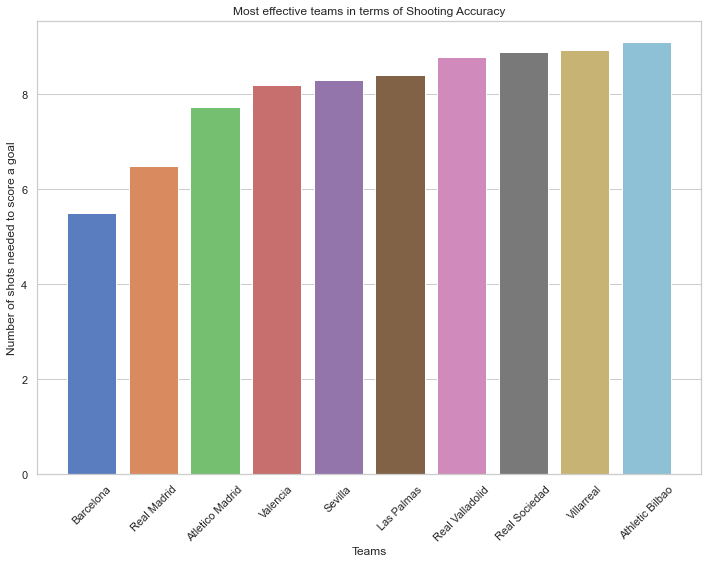

In [238]:
grouped_by_player = df_events[df_events['league'] == 'La Liga'][df_events['event_type'] == 1].groupby('event_team').count()
rouped_by_player_goals = df_events[df_events['league'] == 'La Liga'][(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('event_team').count()
grouped_by_player_not_goals = df_events[df_events['league'] == 'La Liga'][(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('event_team').count()
threshold = grouped_by_player['is_goal'].std()
grouped_by_player_is_goal = df_events[df_events['league'] == 'La Liga'][df_events['is_goal'] == 1].groupby('event_team').count()
grouped_by_player_is_goal_filtered = grouped_by_player_is_goal
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Teams', 
            'Number of shots needed to score a goal',
            'Most effective teams in terms of Shooting Accuracy')
plt.savefig('foot23.png')

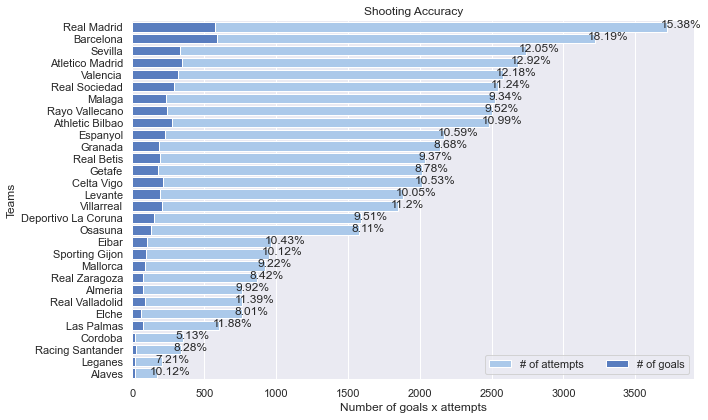

In [239]:
## Creating a dataframe with total of attempts and total goals
result_df = pd.DataFrame({'total': total.dropna(), 'is_goal': grouped_by_player_is_goal_filtered['id_event']})
## Sorting values by total
result_df.sort_values('total', ascending=False, inplace=True)

## Setting style to dark
sns.set(style="darkgrid")

## Creating figure
f, ax = plt.subplots(figsize=(10, 6))

## Plotting chart
sns.set_color_codes("pastel")
sns.barplot(x="total",
            y=result_df.index,
            data=result_df,
            label="# of attempts", color="b")

sns.set_color_codes("muted")
sns.barplot(x='is_goal',
            y=result_df.index, 
            data=result_df,
            label="# of goals", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Teams",
       xlabel="Number of goals x attempts", title='Shooting Accuracy')

each = result_df['is_goal'].values
the_total = result_df['total'].values
x_position = 50

for i in range(len(ax.patches[:30])):
    ax.text(ax.patches[i].get_width() - x_position, ax.patches[i].get_y() +.50, 
            str(round((each[i]/the_total[i])*100, 2))+'%')
    
sns.despine(left=True, bottom=True)
f.tight_layout()
plt.savefig('foot24.png')